<a href="https://colab.research.google.com/github/Orixtosius/RNN_Exercises/blob/main/ImageClassificationWithRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input, SimpleRNN, LSTM, GRU, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data( path='mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


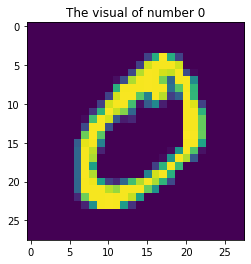

In [3]:
plt.title(f"The visual of number {y_train[1]}")
plt.imshow(x_train[1])

In [4]:
M, T, D = x_train.shape 
K = 10

In [5]:
print(f"Shape of input training data is M: {M} - T:{T} - D:{D}")

Shape of input training data is M: 60000 - T:28 - D:28


In [5]:
model = Model()
i = Input(shape = (T,D))
x = GRU(5)(i)
x = Dense(K)(x)
model = Model(i,x)
model.compile( loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'] )

In [12]:
model = Model()
i = Input(shape = (T,D))
x = LSTM(7)(i)
x = Dense(K)(x)
model = Model(i,x)
model.compile( loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'] )

In [15]:
model = Model()
i = Input(shape = (T,D))
x = LSTM(3)(i)
x = Dense(K)(x)
model = Model(i,x)
model.compile( loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'] )

In [25]:
model = Model()
i = Input(shape = (T,D))
x = LSTM(5, return_sequences = True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(K, activation = 'softmax')(x)
model = Model(i,x)
model.compile( loss='sparse_categorical_crossentropy', optimizer= 'RMSprop' , metrics=['accuracy'] )

In [10]:
model = Model()
i = Input(shape = (T,D))
x = SimpleRNN(5)(i)
x = Dense(K)(x)
model = Model(i,x)
model.compile( loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'] )

In [ ]:
r = model.fit(x_train, y_train, epochs = 100, validation_split=0.5)

In [ ]:
r_simple = model.fit(x_train, y_train, epochs = 100, validation_split=0.5)

In [ ]:
r_LSTM = model.fit(x_train, y_train, epochs = 100, validation_split=0.5)

In [ ]:
r_LSTM_Denser = model.fit(x_train, y_train, epochs = 100, validation_split=0.5)

In [ ]:
r_LSTM_3 = model.fit(x_train, y_train, epochs = 100, validation_split=0.5)

In [26]:
r_LSTM_With_Pooling = model.fit(x_train, y_train, epochs = 100, validation_split=0.5) 

Epoch 1/100
938/938 [==============================] - 12s 11ms/step - loss: 2.2002 - accuracy: 0.2159 - val_loss: 2.0831 - val_accuracy: 0.3121
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 1.9844 - accuracy: 0.3484 - val_loss: 1.8906 - val_accuracy: 0.3718
Epoch 3/100
938/938 [==============================] - 8s 8ms/step - loss: 1.8216 - accuracy: 0.3816 - val_loss: 1.7496 - val_accuracy: 0.3922
Epoch 4/100
938/938 [==============================] - 7s 7ms/step - loss: 1.6958 - accuracy: 0.4087 - val_loss: 1.6268 - val_accuracy: 0.4250
Epoch 5/100
938/938 [==============================] - 7s 7ms/step - loss: 1.5783 - accuracy: 0.4380 - val_loss: 1.5270 - val_accuracy: 0.4551
Epoch 6/100
938/938 [==============================] - 8s 8ms/step - loss: 1.4728 - accuracy: 0.4671 - val_loss: 1.4291 - val_accuracy: 0.4760
Epoch 7/100
938/938 [==============================] - 7s 7ms/step - loss: 1.3889 - accuracy: 0.5019 - val_loss: 1.3590 - val_accuracy: 0.51

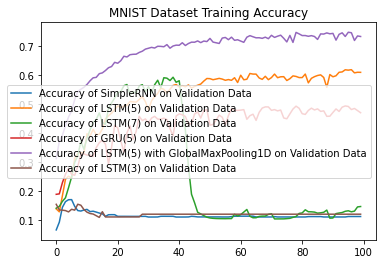

In [27]:
plt.title("MNIST Dataset Training Accuracy")
plt.plot(r_simple.history['val_accuracy'], label = 'Accuracy of SimpleRNN on Validation Data')
plt.plot(r_LSTM.history['val_accuracy'], label = 'Accuracy of LSTM(5) on Validation Data')
plt.plot(r_LSTM_Denser.history['val_accuracy'], label = 'Accuracy of LSTM(7) on Validation Data')
plt.plot(r.history['val_accuracy'], label = 'Accuracy of GRU(5) on Validation Data')
plt.plot(r_LSTM_With_Pooling.history['val_accuracy'], label = 'Accuracy of LSTM(5) with GlobalMaxPooling1D on Validation Data')
plt.plot(r_LSTM_3.history['val_accuracy'], label = 'Accuracy of LSTM(3) on Validation Data')
plt.legend()
plt.show()